In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [ ]:
df=pd.read_csv('train-chennai-sale.csv')
#Reading csv file from directory

In [ ]:
#Creating House age column by using house sold date and house build date, dropping DATE_SALE and DATE_BUILD columns
df['House_Age']=pd.to_datetime(df['DATE_SALE']).apply(lambda x: x.year) - pd.to_datetime(df['DATE_BUILD']).apply(lambda x: x.year)
df = df.drop(columns=['DATE_SALE', 'DATE_BUILD'])
df.head(5)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_Age
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   BUILDTYPE      7109 non-null   object 
 10  UTILITY_AVAIL  7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  QS_ROOMS       7109 non-null   float64
 14  QS_BATHROOM    7109 non-null   float64
 15  QS_BEDROOM     7109 non-null   float64
 16  QS_OVERALL     7061 non-null   float64
 17  REG_FEE        7109 non-null   int64  
 18  COMMIS  

In [ ]:
#Deleting null values from data set
df=df.dropna()

In [ ]:
#All columns have non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   BUILDTYPE      7056 non-null   object 
 10  UTILITY_AVAIL  7056 non-null   object 
 11  STREET         7056 non-null   object 
 12  MZZONE         7056 non-null   object 
 13  QS_ROOMS       7056 non-null   float64
 14  QS_BATHROOM    7056 non-null   float64
 15  QS_BEDROOM     7056 non-null   float64
 16  QS_OVERALL     7056 non-null   float64
 17  REG_FEE        7056 non-null   int64  
 18  COMMIS  

In [ ]:
#Dropping duplicates from data set
df=df.drop_duplicates()

In [ ]:
#there are no duplicates in dataset
df.dtypes
#df.shape
#df.isnull().sum()

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
House_Age          int64
dtype: object

# Spelling_Mistake check and correction to common values

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df['PARK_FACIL'].unique()


array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()
         

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:

df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df = df.replace({'AREA':{'Karapakam':'Karapakkam', 
                         'Ana Nagar':'Anna Nagar',
                         'Ann Nagar':'Anna Nagar',
                         'Adyr':'Adyar',
                         'Velchery':'Velachery',
                         'Chrompt':'Chrompet',
                         'Chormpet':'Chrompet',
                         'Chrmpet':'Chrompet',
                         'KKNagar':'KK Nagar',
                         'TNagar':'T Nagar'
                         },
                 'SALE_COND':{'Ab  Normaal':'AbNormal','Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'},
                 'PARK_FACIL':{'Noo':'No'},
                 'BUILDTYPE':{'Comercial':'Commercial','Other':'Others'},
                 'UTILITY_AVAIL':{'All Pub':'AllPub','NoSewr ':'NoSewr'},
                 'STREET':{'Pavd':'Paved','NoAccess':'No Access'}
                         })


In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   BUILDTYPE      7056 non-null   object 
 10  UTILITY_AVAIL  7056 non-null   object 
 11  STREET         7056 non-null   object 
 12  MZZONE         7056 non-null   object 
 13  QS_ROOMS       7056 non-null   float64
 14  QS_BATHROOM    7056 non-null   float64
 15  QS_BEDROOM     7056 non-null   float64
 16  QS_OVERALL     7056 non-null   float64
 17  House_Age      7056 non-null   int64  
 18  REG_FEE 

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'House_Age', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
df=df.reindex(columns=['PRT_ID','AREA','INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL','STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age','REG_FEE', 'COMMIS','SALES_PRICE'])
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,...,Paved,A,4.0,3.9,4.9,4.330,44,380000,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,...,Gravel,RH,4.9,4.2,2.5,3.765,11,760122,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,...,Gravel,RL,4.1,3.8,2.2,3.090,20,421094,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,...,Paved,I,4.7,3.9,3.6,4.010,22,356321,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,...,Gravel,C,3.0,2.5,4.1,3.290,30,237000,74063,7406250


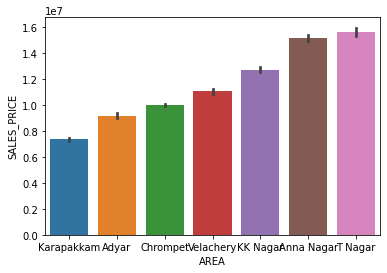

In [ ]:
sns.barplot(x=df['AREA'],y=df['SALES_PRICE'],order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

In [ ]:
#there is order in data, AREA column with respect to SALES_PRICE, Hence We need to follow label encoding for AREA column

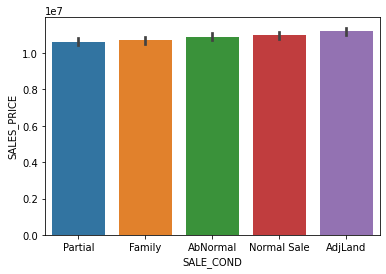

In [ ]:
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'],order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

In [ ]:
#We can see there is minimal order in data SALE_COND with respect to SALE_PRICE, We need to do label encoding for the data

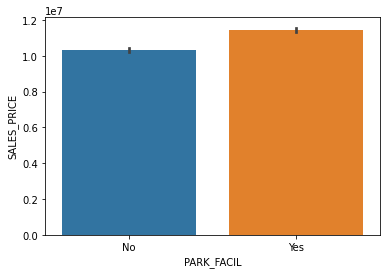

In [ ]:
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])


In [ ]:
#We can see there is order in data PARK_FACIL with respect to SALE_PRICE, We need to do label encoding for the data

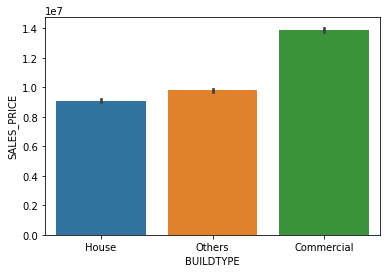

In [ ]:
sns.barplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'],order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

In [ ]:
#We can see there is no order in data BUILD_TYPE with respect to SALE_PRICE, We need to do One-Hot encoding for the data

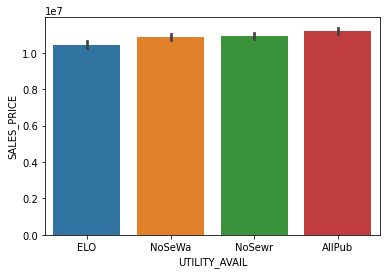

In [ ]:
sns.barplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'],order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

In [ ]:
#We can see there is order in data UTILITY_AVAIL with respect to SALE_PRICE, We need to do label encoding for the data

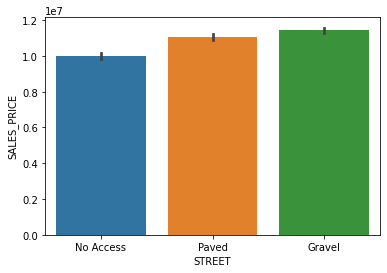

In [ ]:
sns.barplot(x=df['STREET'],y=df['SALES_PRICE'],order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

In [ ]:
#We can see there is order in data STREET with respect to SALE_PRICE, We need to do label encoding for the data

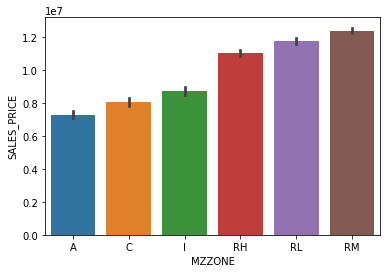

In [ ]:
sns.barplot(x=df['MZZONE'],y=df['SALES_PRICE'],order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

In [ ]:
#We can see there is order in data MZZONE with respect to SALE_PRICE, We need to do label encoding for the data

In [ ]:
dfT=df

In [ ]:
#One-Hot Encoding for BUILDTYPE  data
dfT=pd.get_dummies(dfT,columns=['BUILDTYPE'])


In [ ]:
dfT['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
#Label Encoding for AREA data having order with SALE_PICE
dfT['AREA'] = dfT['AREA'].map({'Karapakkam' : 0, 'Adyar' : 1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [ ]:
dfT['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
#Label Encoding for SALE_COND data having order with SALE_PICE
dfT['SALE_COND'] = dfT['SALE_COND'].map({'Partial' : 0, 'Family' : 1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})

In [ ]:
dfT['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [ ]:
#Label Encoding for UTILITY_AVAIL data having order with SALE_PICE
dfT['UTILITY_AVAIL'] = dfT['UTILITY_AVAIL'].map({'ELO' : 0, 'NoSeWa' : 1,'NoSewr':2,'AllPub':3})

In [ ]:
dfT['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
#Label Encoding for STREET data having order with SALE_PICE
dfT['STREET'] = dfT['STREET'].map({'No Access' : 0, 'Paved' : 1,'Gravel':2})

In [ ]:
dfT['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
#Label Encoding for MZZONE data having order with SALE_PICE
dfT['MZZONE'] = dfT['MZZONE'].map({'A' : 0, 'C' : 1,'I':2,'RH':3,'RL':4,'RM':5})

In [ ]:
dfT['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Label Encoding for PARK_FACIL data having order with SALE_PICE
dfT['PARK_FACIL'] = dfT['PARK_FACIL'].map({'No' : 0, 'Yes' : 1})

In [ ]:
dfT.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,REG_FEE,COMMIS,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,P03210,0,1004,131,1.0,1.0,3,2,1,3,...,3.9,4.9,4.330,44,380000,144400,7600000,1,0,0
1,P09411,5,1986,26,2.0,1.0,5,2,0,3,...,4.2,2.5,3.765,11,760122,304049,21717770,1,0,0
2,P01812,1,909,70,1.0,1.0,3,2,1,0,...,3.8,2.2,3.090,20,421094,92114,13159200,1,0,0
3,P05346,3,1855,14,3.0,2.0,5,1,0,2,...,3.9,3.6,4.010,22,356321,77042,9630290,0,0,1
4,P06210,0,1226,84,1.0,1.0,3,2,1,3,...,2.5,4.1,3.290,30,237000,74063,7406250,0,0,1


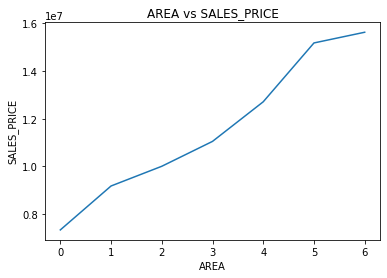

In [ ]:
dfT.groupby('AREA')['SALES_PRICE'].mean().plot()
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('AREA vs SALES_PRICE')
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

In [ ]:
#AREA vs SALES_PRICE have linear relation between them

In [ ]:
dfT[['AREA','SALES_PRICE']].corr()
#AREA has good correlation SALES_PRICE of .69

,AREA,SALES_PRICE
AREA,1.000000,0.694215
SALES_PRICE,0.694215,1.000000


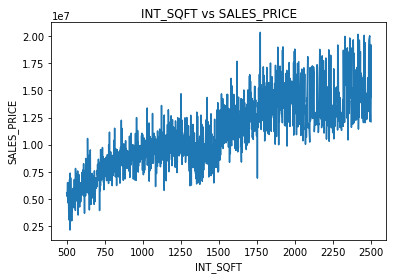

In [ ]:
dfT.groupby('INT_SQFT')['SALES_PRICE'].mean().plot()
plt.xlabel('INT_SQFT')
plt.ylabel('SALES_PRICE')
plt.title('INT_SQFT vs SALES_PRICE')
plt.show()


In [ ]:
#INT_SQFT has linear relationshipt with SALES_PRICE and good correlation value
dfT[['INT_SQFT','SALES_PRICE']].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612668
SALES_PRICE,0.612668,1.000000


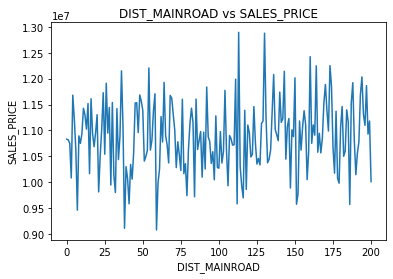

In [ ]:
dfT.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().plot()
plt.xlabel('DIST_MAINROAD')
plt.ylabel('SALES_PRICE')
plt.title('DIST_MAINROAD vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['DIST_MAINROAD','SALES_PRICE']].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018062
SALES_PRICE,0.018062,1.000000


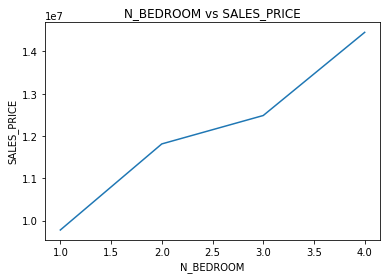

In [ ]:
dfT.groupby('N_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BEDROOM vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['N_BEDROOM','SALES_PRICE']].corr()

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.332595
SALES_PRICE,0.332595,1.000000


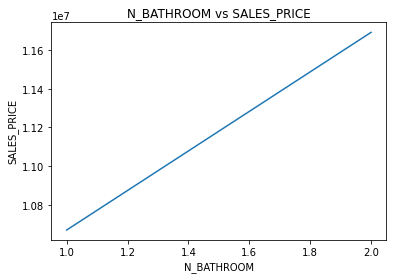

In [ ]:
dfT.groupby('N_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_BATHROOM vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['N_BATHROOM','SALES_PRICE']].corr()

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.110984
SALES_PRICE,0.110984,1.000000


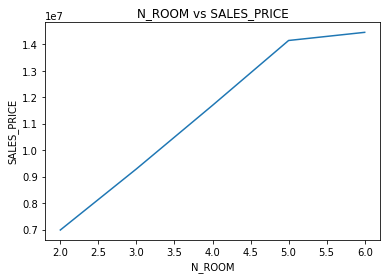

In [ ]:
dfT.groupby('N_ROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('N_ROOM')
plt.ylabel('SALES_PRICE')
plt.title('N_ROOM vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['N_ROOM','SALES_PRICE']].corr()

,N_ROOM,SALES_PRICE
N_ROOM,1.000000,0.603417
SALES_PRICE,0.603417,1.000000


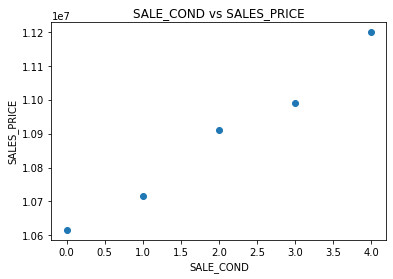

In [ ]:
dfT.groupby('SALE_COND')['SALES_PRICE'].mean().plot(style='o')
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.title('SALE_COND vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['SALE_COND','SALES_PRICE']].corr()

,SALE_COND,SALES_PRICE
SALE_COND,1.000000,0.054233
SALES_PRICE,0.054233,1.000000


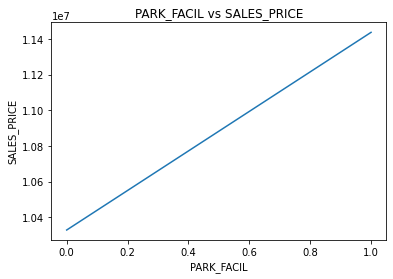

In [ ]:
dfT.groupby('PARK_FACIL')['SALES_PRICE'].mean().plot()
plt.xlabel('PARK_FACIL')
plt.ylabel('SALES_PRICE')
plt.title('PARK_FACIL vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['PARK_FACIL','SALES_PRICE']].corr()

,PARK_FACIL,SALES_PRICE
PARK_FACIL,1.000000,0.146975
SALES_PRICE,0.146975,1.000000


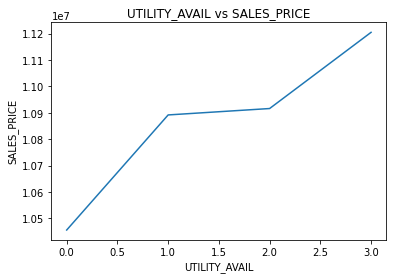

In [ ]:
dfT.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().plot()
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.title('UTILITY_AVAIL vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['UTILITY_AVAIL','SALES_PRICE']].corr()

,UTILITY_AVAIL,SALES_PRICE
UTILITY_AVAIL,1.0000,0.0648
SALES_PRICE,0.0648,1.0000


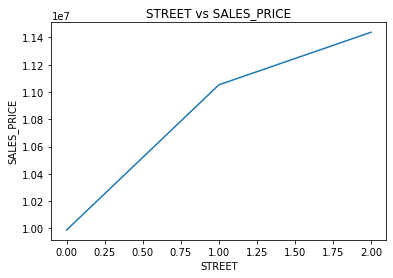

In [ ]:
dfT.groupby('STREET')['SALES_PRICE'].mean().plot()
plt.xlabel('STREET')
plt.ylabel('SALES_PRICE')
plt.title('STREET vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['STREET','SALES_PRICE']].corr()

,STREET,SALES_PRICE
STREET,1.00000,0.15006
SALES_PRICE,0.15006,1.00000


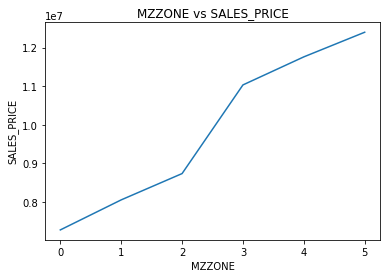

In [ ]:
dfT.groupby('MZZONE')['SALES_PRICE'].mean().plot()
plt.xlabel('MZZONE')
plt.ylabel('SALES_PRICE')
plt.title('MZZONE vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['MZZONE','SALES_PRICE']].corr()

,MZZONE,SALES_PRICE
MZZONE,1.000000,0.427526
SALES_PRICE,0.427526,1.000000


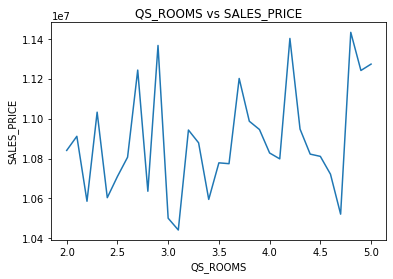

In [ ]:
dfT.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_ROOMS')
plt.ylabel('SALES_PRICE')
plt.title('QS_ROOMS vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.022278
SALES_PRICE,0.022278,1.000000


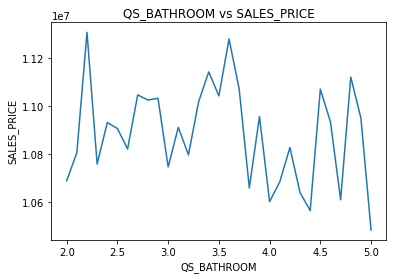

In [ ]:
dfT.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BATHROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BATHROOM vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.012346
SALES_PRICE,-0.012346,1.000000


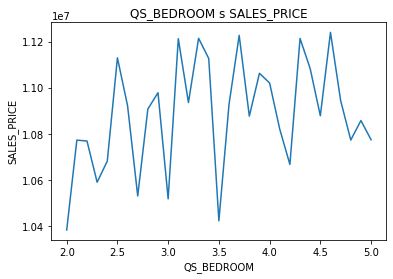

In [ ]:
dfT.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BEDROOM')
plt.ylabel('SALES_PRICE')
plt.title('QS_BEDROOM s SALES_PRICE')
plt.show()

In [ ]:
dfT[['QS_BEDROOM','SALES_PRICE']].corr()

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.020079
SALES_PRICE,0.020079,1.000000


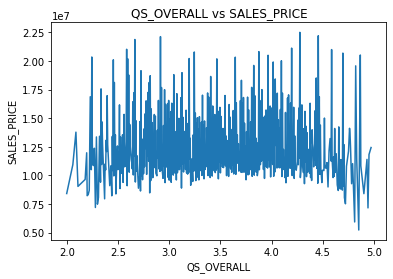

In [ ]:
dfT.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_OVERALL')
plt.ylabel('SALES_PRICE')
plt.title('QS_OVERALL vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['QS_OVERALL','SALES_PRICE']].corr()

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020352
SALES_PRICE,0.020352,1.000000


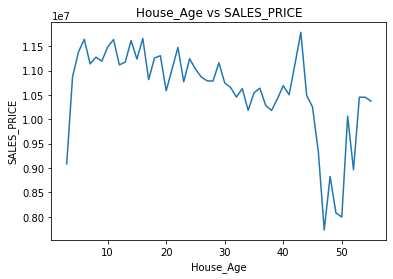

In [ ]:
dfT.groupby('House_Age')['SALES_PRICE'].mean().plot()
plt.xlabel('House_Age')
plt.ylabel('SALES_PRICE')
plt.title('House_Age vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['House_Age','SALES_PRICE']].corr()

,House_Age,SALES_PRICE
House_Age,1.000000,-0.120418
SALES_PRICE,-0.120418,1.000000


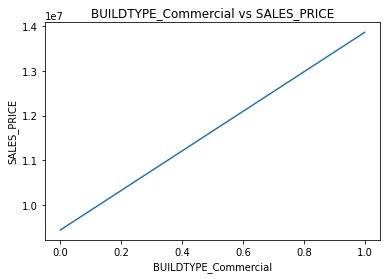

In [ ]:
dfT.groupby('BUILDTYPE_Commercial')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Commercial')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Commercial vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['BUILDTYPE_Commercial','SALES_PRICE']].corr()

,BUILDTYPE_Commercial,SALES_PRICE
BUILDTYPE_Commercial,1.000000,0.551799
SALES_PRICE,0.551799,1.000000


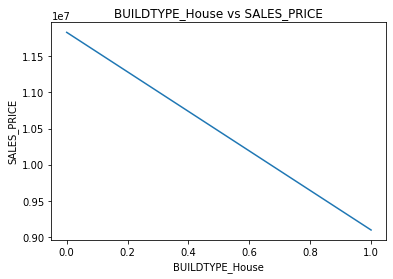

In [ ]:
dfT.groupby('BUILDTYPE_House')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_House')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_House vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['BUILDTYPE_House','SALES_PRICE']].corr()

,BUILDTYPE_House,SALES_PRICE
BUILDTYPE_House,1.000000,-0.344821
SALES_PRICE,-0.344821,1.000000


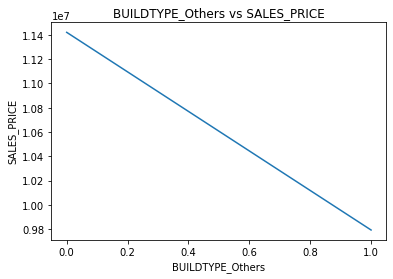

In [ ]:
dfT.groupby('BUILDTYPE_Others')['SALES_PRICE'].mean().plot()
plt.xlabel('BUILDTYPE_Others')
plt.ylabel('SALES_PRICE')
plt.title('BUILDTYPE_Others vs SALES_PRICE')
plt.show()

In [ ]:
dfT[['BUILDTYPE_Others','SALES_PRICE']].corr()

,BUILDTYPE_Others,SALES_PRICE
BUILDTYPE_Others,1.000000,-0.202549
SALES_PRICE,-0.202549,1.000000


In [ ]:
#PRT_ID dont contribute to the sale prediction as it is just id to data. Dropping it from dataframe
#['DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age'] these array of columns dont have linear relationship with SALES_PRICE. So dropping them from dataframe
# 'REG_FEE', 'COMMIS' are completely dependent on SALES_PRICE and are paid once property sold. So these two features dont contribute to Sales prediction and dropping from dataframe
dfT=dfT.drop(columns=['PRT_ID','DIST_MAINROAD','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL','House_Age', 'REG_FEE', 'COMMIS'])

In [ ]:
dfT.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1.0,1.0,3,2,1,3,1,0,7600000,1,0,0
1,5,1986,2.0,1.0,5,2,0,3,2,3,21717770,1,0,0
2,1,909,1.0,1.0,3,2,1,0,2,4,13159200,1,0,0
3,3,1855,3.0,2.0,5,1,0,2,1,2,9630290,0,0,1
4,0,1226,1.0,1.0,3,2,1,3,2,1,7406250,0,0,1


In [ ]:
dfT=dfT.reindex(columns=['AREA','INT_SQFT','N_BEDROOM', 'N_BATHROOM','N_ROOM', 'SALE_COND', 'PARK_FACIL','UTILITY_AVAIL','STREET', 'MZZONE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others','SALES_PRICE'])
dfT.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,SALES_PRICE
0,0,1004,1.0,1.0,3,2,1,3,1,0,1,0,0,7600000
1,5,1986,2.0,1.0,5,2,0,3,2,3,1,0,0,21717770
2,1,909,1.0,1.0,3,2,1,0,2,4,1,0,0,13159200
3,3,1855,3.0,2.0,5,1,0,2,1,2,0,0,1,9630290
4,0,1226,1.0,1.0,3,2,1,3,2,1,0,0,1,7406250


In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7056 non-null   int64  
 1   INT_SQFT              7056 non-null   int64  
 2   N_BEDROOM             7056 non-null   float64
 3   N_BATHROOM            7056 non-null   float64
 4   N_ROOM                7056 non-null   int64  
 5   SALE_COND             7056 non-null   int64  
 6   PARK_FACIL            7056 non-null   int64  
 7   UTILITY_AVAIL         7056 non-null   int64  
 8   STREET                7056 non-null   int64  
 9   MZZONE                7056 non-null   int64  
 10  BUILDTYPE_Commercial  7056 non-null   uint8  
 11  BUILDTYPE_House       7056 non-null   uint8  
 12  BUILDTYPE_Others      7056 non-null   uint8  
 13  SALES_PRICE           7056 non-null   int64  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 940.2 KB


In [ ]:
X=dfT[dfT.columns[:-1]].values
Y=dfT['SALES_PRICE'].values
#Extracting  features values to split the data into TRAIN and TEST

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
#Dateset has been split into two sets, train and test data train data with 75% and test data of 25%

In [ ]:
#Scaling the data as many of the data are encoded to smaller values where as INT_SQFT is numerical larger number
#Scaling helps data to normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [ ]:
#Modelling the data using LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#Predict the values using test data
y_pred = regressor.predict(X_test_scaled)

In [ ]:
#Check evaluation metric for the model
from sklearn import metrics 
print('R2- SCORE for linear Regression:', metrics.r2_score(y_test,y_pred))

R2- SCORE for linear Regression: 0.9231162838217286
